In [2]:
import pandas as pd
import numpy as np 
import swifter

In [3]:
df_fire = pd.read_csv("forestfires.csv")

In [4]:
df_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [12]:
# define map function
def map_function(row):
    result = row['X'] * row['wind']
    return result

In [13]:
# applying map function to each row using swifter
df_fire['map_result'] = df_fire.swifter.apply(map_function,axis=1)

In [14]:
df_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,map_result
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,46.9
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,6.3
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,9.1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,32.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,10.8
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,11.6
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,46.9
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,4.0


In [15]:
# perform reduce operation
reduce_result = df_fire['map_result'].sum()


In [16]:
reduce_result

9738.699999999999

In [17]:
des_stats = df_fire.describe()
des_stats

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,map_result
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,18.836944
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,12.885465
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.900000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,8.800000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,16.200000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,27.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,71.200000


In [21]:
grouped_stats = df_fire.groupby('month').agg({'area':['sum','mean','max']})

In [19]:
grouped_stats

area                    
           sum       mean      max
month                             
apr      80.02   8.891111    61.13
aug    2297.99  12.489076   746.28
dec     119.97  13.330000    24.77
feb     125.50   6.275000    51.78
jan       0.00   0.000000     0.00
jul     459.83  14.369687   278.53
jun      99.30   5.841176    70.32
mar     235.26   4.356667    36.85
may      38.48  19.240000    38.48
nov       0.00   0.000000     0.00
oct      99.57   6.638000    49.37
sep    3086.13  17.942616  1090.84

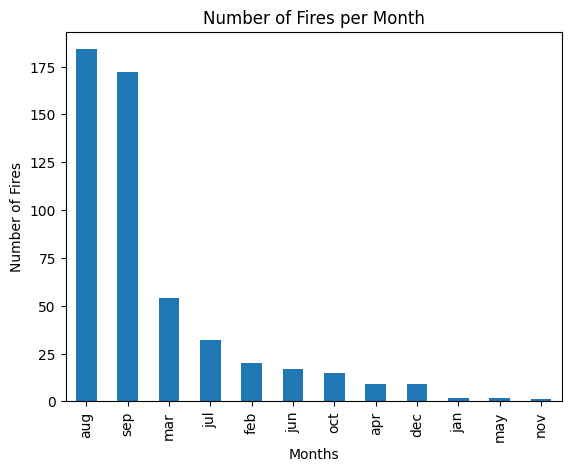

In [25]:
import matplotlib.pyplot as plt

df_fire['month'].value_counts().plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Number of Fires')
plt.title('Number of Fires per Month')
plt.show()

In [26]:
plt.show()